In [19]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK WordNet data
nltk.download('wordnet')

# Load the dataset
df_with_antecedent = pd.read_csv('all_data_fin1.csv', low_memory=False)
#df_with_antecedent= df_with_antecedent.iloc[:10000]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aldi_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
df_with_antecedent
duplicates = df_with_antecedent[df_with_antecedent.duplicated(subset=['doc_no', 'text_part_no',"Sentence#","Word"], keep=False)]

In [28]:
len(duplicates)

1377743

In [81]:
df_with_antecedent.tail

,doc_no,text_part_no,Sentence#,Word,POS,coref_id,antecedent
5910731,bn/voa/02/voa_0265@0265@voa@bn@en@on,0,5,dare,VERB,NaN,NaN
5910732,bn/voa/02/voa_0265@0265@voa@bn@en@on,0,5,approach,NOUN,NaN,NaN
5910733,bn/voa/02/voa_0265@0265@voa@bn@en@on,0,5,him,PRON,4,Prime Minister Ehud Barak
5910734,bn/voa/02/voa_0265@0265@voa@bn@en@on,0,5,,SPACE,NaN,NaN
5910735,bn/voa/02/voa_0265@0265@voa@bn@en@on,0,5,to,PART,NaN,NaN
5910736,bn/voa/02/voa_0265@0265@voa@bn@en@on,0,5,drop,VERB,NaN,NaN
5910737,bn/voa/02/voa_0265@0265@voa@bn@en@on,0,5,out,ADP,NaN,NaN
5910738,bn/voa/02/voa_0265@0265@voa@bn@en@on,0,5,of,ADP,NaN,NaN
5910739,bn/voa/02/voa_0265@0265@voa@bn@en@on,0,5,the,DET,NaN,NaN
5910740,bn/voa/02/voa_0265@0265@voa@bn@en@on,0,5,race,NOUN,NaN,NaN


# Exploratory Data Analysis (EDA) and Visualization:

To perform EDA and create attractive plots, you can use libraries like matplotlib and seaborn. Here's an example of code to create a histogram of label counts:

In [51]:
df_with_antecedent.describe()

,text_part_no,Sentence#
count,5.910741e+06,5.910741e+06
mean,4.761037e+00,1.749852e+02
std,4.933339e+00,2.188833e+02
min,0.000000e+00,1.000000e+00
25%,1.000000e+00,3.500000e+01
50%,3.000000e+00,9.400000e+01
75%,7.000000e+00,2.200000e+02
max,2.200000e+01,1.535000e+03


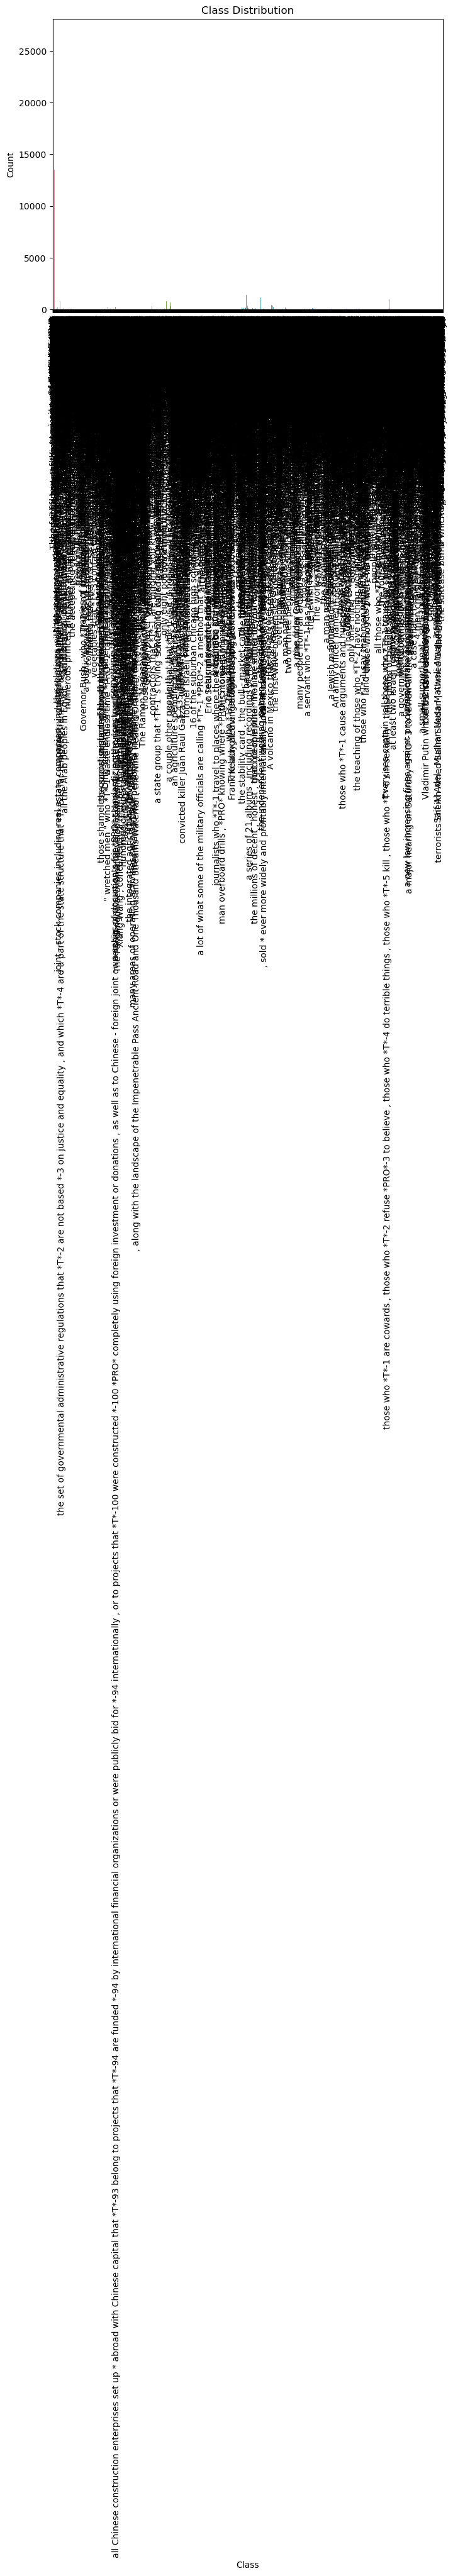

In [52]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='antecedent', data=df_with_antecedent)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

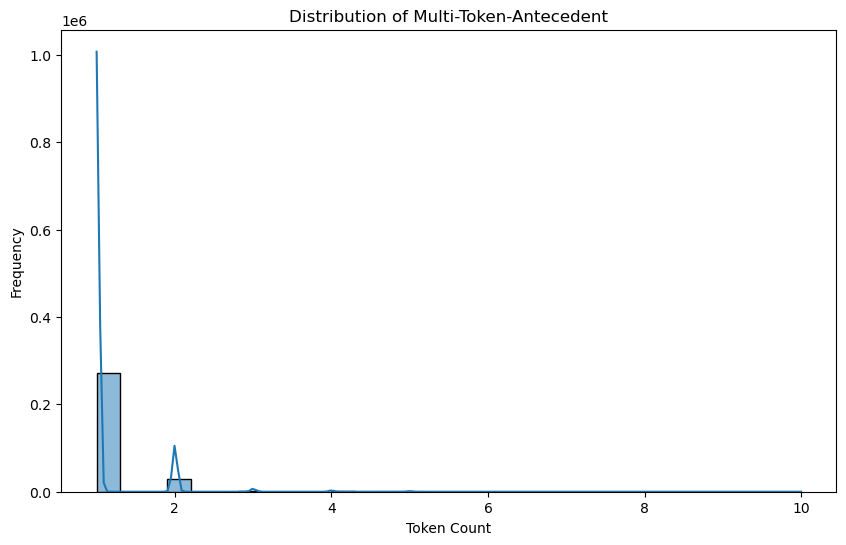

In [53]:
# Visualize the distribution of Multi-Token-Antecedent
token_counts = [len(word.split('-')) for word in df_with_antecedent['antecedent'] if type(word) !=float]
plt.figure(figsize=(10, 6))
sns.histplot(token_counts, bins=30, kde=True)
plt.title('Distribution of Multi-Token-Antecedent')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.show()

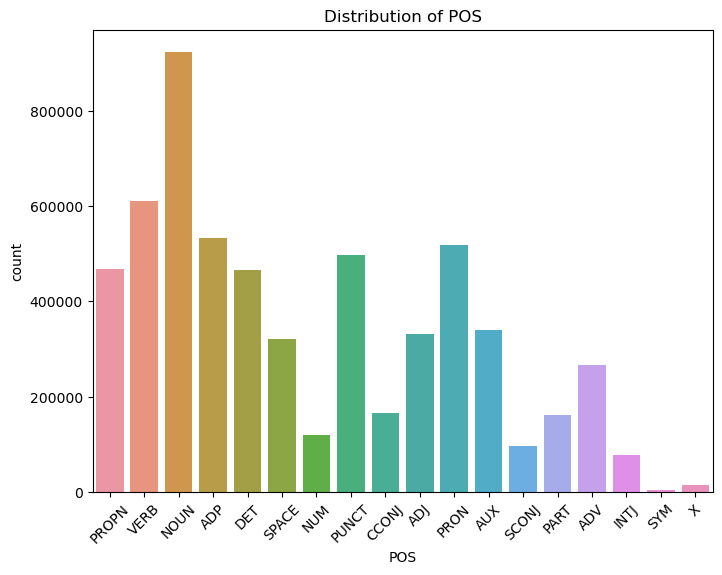

In [54]:

# Visualize the distribution of a single variable (e.g., 'POS')
plt.figure(figsize=(8, 6))
sns.countplot(data=df_with_antecedent, x='POS')
plt.title('Distribution of POS')
plt.xticks(rotation=45)
plt.show()

# Implementation With Batches

In [55]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import wordnet as wn

# Download NLTK WordNet data
nltk.download('wordnet')

# Load the dataset
df_with_antecedent = pd.read_csv('all_data_fin1.csv', low_memory=False)

# Function to get hypernyms recursively
def get_hypernyms(synset):
    hypernyms = set()
    for hypernym in synset.hypernyms():
        hypernyms |= set(get_hypernyms(hypernym))
    return hypernyms | set(synset.hypernyms())

# Function to extract hypernyms from WordNet
def extract_hypernyms(w):
    hypernyms_ = []
    synsets = wn.synsets(str(w), pos=wn.NOUN)
    if len(synsets) != 0:
        word = synsets[0]
        hypernyms = get_hypernyms(word)
        for hypernym in hypernyms:
            hypernyms_.append(hypernym.lemma_names('eng')[0])
    return hypernyms_

# Function to label animate and inanimate
def label_animate(hypernyms):
    if type(hypernyms) != float:
        if len(hypernyms) == 0:
            return "wordnet_false"
        if "living_thing" not in hypernyms:
            return "inanimate"
        else:
            return "animate"




start_time = time.time()

batch_size = 100000
num_batches = len(df_with_antecedent) // batch_size

# Process the data in batches
for batch_num in range(num_batches + 1):
    # Create a subset for the current batch
    start_idx = batch_num * batch_size
    end_idx = (batch_num + 1) * batch_size
    batch_df = df_with_antecedent.iloc[start_idx:end_idx]

    # Apply functions to the dataset for the current batch
    # 1. The new column ("hypernyms") will be added only for NOUN and PNOUN, in which the hypernyms are extracted
    # 2. The new column ("labels") will be added only for NOUN and PNOUN, in which "inanimate" or "animate" labels are extract
    # 3. The "Pronouns" label is extract only for Pronouns 
    # 4. The "other_pos" label is extract for other Part of Speech Taggin
    batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "hypernyms"] = batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "Word"].apply(extract_hypernyms)
    batch_df["labels"] = batch_df["hypernyms"].apply(label_animate)
    batch_df.loc[(batch_df["POS"] == "PRON"), "labels"] = "Pronouns"
    batch_df["labels"] = batch_df["labels"].fillna("other_pos")

    # Initialize the "end_labels" column for the current batch
    batch_df["end_labels"] = np.NaN

    # Create a subset of the dataframe from notnull antecedent values
    #for the current batch
    df_antecedent = batch_df[(batch_df.antecedent.notnull())]

    # Add "end_labels" based on conditions for the current batch
    
    # A "1" was given only to the NOUNs and PROPNs that are antecedents of a pronoun (determined by coref_id) 
    # and were simultaneously labeled as "animate". At the same time, the pronouns were also labeled with a "1".
        
    # A "0" was given only to the NOUNs and PROPNs that are antecedents of a pronoun (determined by coref_id) 
    # and were simultaneously labeled as "inanimate". At the same time, the pronouns were also labeled with a "0".
    
    #If the antecedent consists of multiple nouns and/or PROPNs, it is checked whether all nouns or PROPNs are labeled as 
    #"animate". If at least one noun is labeled as inanimate, then the noun/PROPN and pronoun are labeled with 2.
   
    
    for index, row in df_antecedent.iterrows():
        antecedent = row['antecedent']
        ID = row['coref_id']
        words = antecedent.replace("-", " ").split(" ")
        nounlines = []
        animateCount = 0
        inanimateCount = 0
        for word in words:
            if word != "":
                word_line = batch_df[(batch_df['coref_id'] == ID) & (batch_df['Word'] == word)]
                if len(word_line) > 0:
                    word_line = word_line
                    if word_line['POS'].iloc[0] == "NOUN":
                        nounlines.append(word_line)
                        if word_line['labels'].iloc[0] == "animate":
                            animateCount += 1
                        if word_line['labels'].iloc[0] == "inanimate":
                            inanimateCount = inanimateCount + 1
        if animateCount > 0 and inanimateCount == 0:
            for line in nounlines:
                for i, nounLine in line.iterrows():
                    batch_df.at[i, "end_labels"] = 1
            batch_df.at[index, "end_labels"] = 1
        elif inanimateCount > 0 and animateCount == 0:
            for line in nounlines:
                for i, nounLine in line.iterrows():
                    batch_df.at[i, "end_labels"] = 0
            batch_df.at[index, "end_labels"] = 0
        else:
            for line in nounlines:
                for i, nounLine in line.iterrows():
                    batch_df.at[i, "end_labels"] = 2
            batch_df.at[index, "end_labels"] = 2

    # Save the updated dataframe for the current batch
    batch_df.to_csv(f"updated_data_batch{batch_num}.csv")

elapsed_time_seconds = time.time() - start_time
elapsed_time_minutes = elapsed_time_seconds / 60

print(f"Der Code hat {elapsed_time_minutes:.2f} Minuten gedauert.")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aldi_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "hypernyms"] = batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "Word"].apply(extract_hypernyms)
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "hypernyms"] = batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "Word"].apply(extract_hypernyms)
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["labels"] = batch_df["hypernyms"].apply(label_animate)
C:\Users\aldi_\AppData\Local

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "hypernyms"] = batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "Word"].apply(extract_hypernyms)
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["labels"] = batch_df["hypernyms"].apply(label_animate)
C:\Users\aldi_\AppData\Local

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "hypernyms"] = batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "Word"].apply(extract_hypernyms)
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["labels"] = batch_df["hypernyms"].apply(label_animate)
C:\Users\aldi_\AppData\Local

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "hypernyms"] = batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "Word"].apply(extract_hypernyms)
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["labels"] = batch_df["hypernyms"].apply(label_animate)
C:\Users\aldi_\AppData\Local

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "hypernyms"] = batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "Word"].apply(extract_hypernyms)
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["labels"] = batch_df["hypernyms"].apply(label_animate)
C:\Users\aldi_\AppData\Local

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "hypernyms"] = batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "Word"].apply(extract_hypernyms)
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["labels"] = batch_df["hypernyms"].apply(label_animate)
C:\Users\aldi_\AppData\Local

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "hypernyms"] = batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "Word"].apply(extract_hypernyms)
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["labels"] = batch_df["hypernyms"].apply(label_animate)
C:\Users\aldi_\AppData\Local

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "hypernyms"] = batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "Word"].apply(extract_hypernyms)
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["labels"] = batch_df["hypernyms"].apply(label_animate)
C:\Users\aldi_\AppData\Local

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "hypernyms"] = batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "Word"].apply(extract_hypernyms)
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["labels"] = batch_df["hypernyms"].apply(label_animate)
C:\Users\aldi_\AppData\Local

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "hypernyms"] = batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "Word"].apply(extract_hypernyms)
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["labels"] = batch_df["hypernyms"].apply(label_animate)
C:\Users\aldi_\AppData\Local

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "hypernyms"] = batch_df.loc[(batch_df["POS"] == "NOUN") | (batch_df["POS"] == "PROPN"), "Word"].apply(extract_hypernyms)
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\3622456714.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df["labels"] = batch_df["hypernyms"].apply(label_animate)
C:\Users\aldi_\AppData\Local

Der Code hat 169.37 Minuten gedauert.


In [67]:
# Concatenate all 60 batches into one dataframe 
list_of_files=[]
for batch_num in range(60):
    list_of_files.append(f"updated_data_batch{batch_num}.csv")

final_ = pd.DataFrame() 
for df_file in list_of_files:
    update_bach=pd.read_csv(df_file, low_memory=False)
    final_ = pd.concat([final_, update_bach], ignore_index=True)

# Save DataFrame as a CSV file
#final_.to_csv('all_data_endlabels.csv', index=False)    

In [73]:
final_.shape

(5910741, 11)

In [25]:
#final_=pd.read_csv('all_data_endlabels.csv', low_memory=False)

In [74]:
#Given that we need the raw sentences and the sentence numbering for the word-embedding extraction, 
#we are adding two columns here: 'Sentence' as a tupel and 'Sentence_no'. Thus, each word is assigned to its own sentence.
import time

start_time = time.time()
batch_size = 10000
num_batches = len(final_) // batch_size


old_sentence_list = ""
counter = -1

# Process the data in batches
for batch_num in range(num_batches + 1):
    # Create a subset for the current batch
    start_idx = batch_num * batch_size
    end_idx = (batch_num + 1) * batch_size
    batch_df = final_.iloc[start_idx:end_idx]
    batch_df['Sentence'] = None
    batch_df['Sentence_no'] = None

   
    for index, row in batch_df.iterrows():

        sentence_list  = batch_df[(batch_df["Sentence#"] == row['Sentence#']) & (batch_df["doc_no"] == row["doc_no"]) & (batch_df["text_part_no"] == row["text_part_no"])]['Word'].tolist()
        batch_df.at[index,'Sentence'] = tuple( sentence_list )
        if old_sentence_list != sentence_list:
            counter += 1
        batch_df.at[index , 'Sentence_no'] = str(counter)

    # print(sentence_list)
        old_sentence_list = sentence_list

    output_headers = ["Sentence","Sentence_no","Word","POS","coref_id","antecedent","hypernyms","labels","end_labels"]
    df_output = batch_df[output_headers]
     # Save the updated dataframe for the current batch
    df_output.to_csv(f"updated_data_batch_with_sentences_{batch_num}.csv")

elapsed_time_seconds = time.time() - start_time
elapsed_time_minutes = elapsed_time_seconds / 60

print(f"Der Code hat {elapsed_time_minutes:.2f} Minuten gedauert.")

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['Sentence_no'] = None
C:\Users\aldi_\AppData\Local\Temp\ipykernel_9668\4122558894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Der Code hat 162.33 Minuten gedauert.


In [43]:
#df=pd.read_csv("updated_data_batch_with_sentences_1_0.csv", low_memory=False)

,Unnamed: 0,Sentence,Sentence_no,Word,POS,coref_id,antecedent,hypernyms,labels,end_labels
0,0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Celebration,PROPN,NaN,NaN,"['abstraction', 'affair', 'entity', 'event', '...",inanimate,NaN
1,1,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Shooting,PROPN,NaN,NaN,"['abstraction', 'act', 'entity', 'event', 'psy...",inanimate,NaN
2,2,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Turns,VERB,NaN,NaN,NaN,other_pos,NaN
3,3,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Wedding,NOUN,1__2,NaN,"['abstraction', 'affair', 'ceremony', 'entity'...",inanimate,NaN
4,4,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Into,ADP,NaN,NaN,NaN,other_pos,NaN
...,...,...,...,...,...,...,...,...,...,...
9995,9995,"('In', 'spite', 'of', 'the', 'endeavors', 'tha...",401,to,ADP,NaN,NaN,NaN,other_pos,NaN
9996,9996,"('In', 'spite', 'of', 'the', 'endeavors', 'tha...",401,the,DET,NaN,NaN,NaN,other_pos,NaN
9997,9997,"('In', 'spite', 'of', 'the', 'endeavors', 'tha...",401,house,NOUN,NaN,NaN,"['structure', 'object', 'dwelling', 'entity', ...",inanimate,NaN
9998,9998,"('In', 'spite', 'of', 'the', 'endeavors', 'tha...",401,of,ADP,NaN,NaN,NaN,other_pos,NaN


In [90]:
# Concatenate all 593 batches into one dataframe

start_time = time.time()
list_of_files=[]
for batch_num in range(592):
    list_of_files.append(f"updated_data_batch_with_sentences_{batch_num}.csv")

concat_with_sentences = pd.DataFrame() 
for df_file in list_of_files:
    update_bach=pd.read_csv(df_file, low_memory=False)
    concat_with_sentences = pd.concat([concat_with_sentences, update_bach], ignore_index=True)


# Save DataFrame as a CSV file
concat_with_sentences.to_csv('final_endlabels_with_sentences.csv', index=False)

elapsed_time_seconds = time.time() - start_time
elapsed_time_minutes = elapsed_time_seconds / 60

print(f"Der Code hat {elapsed_time_minutes:.2f} Minuten gedauert.")

Der Code hat 3.04 Minuten gedauert.


In [91]:
concat_with_sentences

,Unnamed: 0,Sentence,Sentence_no,Word,POS,coref_id,antecedent,hypernyms,labels,end_labels
0,0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Celebration,PROPN,NaN,NaN,"['psychological_feature', 'social_event', 'abs...",inanimate,NaN
1,1,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Shooting,PROPN,NaN,NaN,"['psychological_feature', 'act', 'abstraction'...",inanimate,NaN
2,2,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Turns,VERB,NaN,NaN,NaN,other_pos,NaN
3,3,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Wedding,NOUN,1__2,NaN,"['psychological_feature', 'social_event', 'abs...",inanimate,NaN
4,4,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Into,ADP,NaN,NaN,NaN,other_pos,NaN
...,...,...,...,...,...,...,...,...,...,...
5910736,5910736,"('Barak', 'is', 'facing', 'mounting', 'pressur...",307833,drop,VERB,NaN,NaN,NaN,other_pos,NaN
5910737,5910737,"('Barak', 'is', 'facing', 'mounting', 'pressur...",307833,out,ADP,NaN,NaN,NaN,other_pos,NaN
5910738,5910738,"('Barak', 'is', 'facing', 'mounting', 'pressur...",307833,of,ADP,NaN,NaN,NaN,other_pos,NaN
5910739,5910739,"('Barak', 'is', 'facing', 'mounting', 'pressur...",307833,the,DET,NaN,NaN,NaN,other_pos,NaN


In [4]:
final_endlabels=pd.read_csv('final_endlabels_with_sentences.csv', low_memory=False)

In [5]:
final_endlabels.shape

(5910741, 10)

In [6]:
final_endlabels.head(10)

,Unnamed: 0,Sentence,Sentence_no,Word,POS,coref_id,antecedent,hypernyms,labels,end_labels
0,0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Celebration,PROPN,NaN,NaN,"['psychological_feature', 'social_event', 'abs...",inanimate,NaN
1,1,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Shooting,PROPN,NaN,NaN,"['psychological_feature', 'act', 'abstraction'...",inanimate,NaN
2,2,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Turns,VERB,NaN,NaN,NaN,other_pos,NaN
3,3,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Wedding,NOUN,1__2,NaN,"['psychological_feature', 'social_event', 'abs...",inanimate,NaN
4,4,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Into,ADP,NaN,NaN,NaN,other_pos,NaN
5,5,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,a,DET,NaN,NaN,NaN,other_pos,NaN
6,6,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Funeral,PROPN,NaN,NaN,"['psychological_feature', 'social_event', 'abs...",inanimate,NaN
7,7,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,in,ADP,NaN,NaN,NaN,other_pos,NaN
8,8,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Southern,PROPN,1__4,NaN,[],wordnet_false,NaN
9,9,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Gaza,PROPN,1__4,NaN,[],wordnet_false,NaN


In [14]:
final_endlabels["Sentence_row"] = np.NaN
final_endlabels["Word_count"] = np.NaN

In [15]:
""" Convert sentences into a string and add two columns to the dataframe:
"Sentence_row" for sentences in string format and "Word_count" for the number of words in each sentence."""


import time 

start_time = time.time()

batch_size = 1000000
num_batches = len(final_endlabels) // batch_size

# Process the data in batches 
for batch_num in range(num_batches + 1):
    # Create a subset for the current batch
    start_idx = batch_num * batch_size
    end_idx = (batch_num + 1) * batch_size
    batch_df = final_endlabels.iloc[start_idx:end_idx]

    for index , row in batch_df.iterrows():
        sen = row['Sentence'].strip(")(").split(", ")
        sen_row = ""
        for word in sen:
            wo = word[1:-1]
            sen_row += wo + " "
        # print(sen_row)
        batch_df.at[index,"Sentence_row"] = sen_row
        batch_df.at[index,"Word_count"] = len(sen)
    batch_df.to_csv(f"updated_data_batch_with_word_count_{batch_num}.csv")
elapsed_time_seconds = time.time() - start_time
elapsed_time_minutes = elapsed_time_seconds / 60

print(f"Der Code hat {elapsed_time_minutes:.2f} Minuten gedauert.")

Der Code hat 14.47 Minuten gedauert.


In [16]:
# Concatenate all 5 batches into one dataframe

start_time = time.time()
list_of_files=[]
for batch_num in range(6):
    list_of_files.append(f"updated_data_batch_with_word_count_{batch_num}.csv")

concat_with_sentences_word_count = pd.DataFrame() 
for df_file in list_of_files:
    update_bach=pd.read_csv(df_file, low_memory=False)
    concat_with_sentences_word_count = pd.concat([concat_with_sentences_word_count, update_bach], ignore_index=True)


# Save DataFrame as a CSV file
concat_with_sentences_word_count.to_csv('final_endlabels_with_sentences_word_count.csv', index=False)

elapsed_time_seconds = time.time() - start_time
elapsed_time_minutes = elapsed_time_seconds / 60

print(f"Der Code hat {elapsed_time_minutes:.2f} Minuten gedauert.")

Der Code hat 2.18 Minuten gedauert.


In [17]:
final_=pd.read_csv('final_endlabels_with_sentences_word_count.csv', low_memory=False)

In [12]:
final_.shape

(5910741, 13)

In [13]:
final_

,Unnamed: 0.1,Unnamed: 0,Sentence,Sentence_no,Word,POS,coref_id,antecedent,hypernyms,labels,end_labels,Sentence_row,Word_count
0,0,0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Celebration,PROPN,NaN,NaN,"['psychological_feature', 'social_event', 'abs...",inanimate,NaN,Celebration Shooting Turns Wedding Into a Fune...,82.0
1,1,1,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Shooting,PROPN,NaN,NaN,"['psychological_feature', 'act', 'abstraction'...",inanimate,NaN,Celebration Shooting Turns Wedding Into a Fune...,82.0
2,2,2,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Turns,VERB,NaN,NaN,NaN,other_pos,NaN,Celebration Shooting Turns Wedding Into a Fune...,82.0
3,3,3,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Wedding,NOUN,1__2,NaN,"['psychological_feature', 'social_event', 'abs...",inanimate,NaN,Celebration Shooting Turns Wedding Into a Fune...,82.0
4,4,4,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,Into,ADP,NaN,NaN,NaN,other_pos,NaN,Celebration Shooting Turns Wedding Into a Fune...,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5910736,5910736,5910736,"('Barak', 'is', 'facing', 'mounting', 'pressur...",307833,drop,VERB,NaN,NaN,NaN,other_pos,NaN,Barak is facing mounting pressure ICH from wit...,44.0
5910737,5910737,5910737,"('Barak', 'is', 'facing', 'mounting', 'pressur...",307833,out,ADP,NaN,NaN,NaN,other_pos,NaN,Barak is facing mounting pressure ICH from wit...,44.0
5910738,5910738,5910738,"('Barak', 'is', 'facing', 'mounting', 'pressur...",307833,of,ADP,NaN,NaN,NaN,other_pos,NaN,Barak is facing mounting pressure ICH from wit...,44.0
5910739,5910739,5910739,"('Barak', 'is', 'facing', 'mounting', 'pressur...",307833,the,DET,NaN,NaN,NaN,other_pos,NaN,Barak is facing mounting pressure ICH from wit...,44.0
